In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtic


In [4]:

df_churn = pd.read_csv(r"C:\Users\raaga\Downloads\CHURN DATASET\WA_Fn-UseC_-Telco-Customer-Churn.csv", sep=',');
df_churn = pd.read_csv(r"C:\Users\raaga\Downloads\CHURN DATASET\WA_Fn-UseC_-Telco-Customer-Churn.csv")



In [48]:
df_churn.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Dropping customerID


df_churn.drop('customerID', axis=1, inplace=True)


In [6]:
df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
# Having a look at the data types

df_churn.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [7]:
# 'TotalCharges' is supposed to be  numerical, but it's an onject
# We will convert it into numerical data type

df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')

# Checking its datatype
df_churn['TotalCharges'].dtypes

dtype('float64')

In [8]:
# Checking whether we have any missing values

df_churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# Total Charges has 11 missing values
# We will drop the rows with missing data and check for missing values again

df_churn = df_churn.dropna()
df_churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

C:\Users\raaga\AppData\Local\Temp\ipykernel_4516\1735535949.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'tenure'),
  Text(1.5, 0, 'MonthlyCharges'),
  Text(2.5, 0, 'TotalCharges'),
  Text(3.5, 0, 'Churn')])

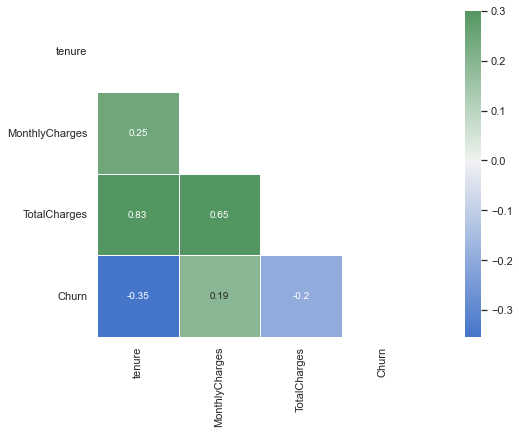

In [13]:
# Using correlation matrix to understand the correlation between numerical variables


import seaborn as sns


df_corr = df_churn.corr()

sns.set(style="white")
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 6))

cmap = sns.diverging_palette(255, 133, as_cmap=True)

sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, annot=True)

plt.yticks(rotation=0, ha="right")
plt.xticks(rotation=90, ha="center")

In [9]:
# We can observe that 'TotalCharges' has high positive correlation with 'tenure' and 'MonthlyCharges'
# Hence, we will remove 'TotalCharges' from the dataframe

df_churn.drop('TotalCharges', axis=1, inplace=True)

# Checking whether 'TotalCharges' has been removed
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


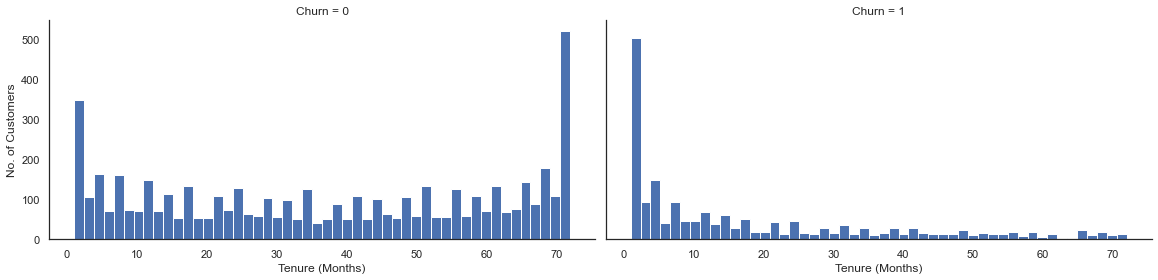

In [15]:
# Distribution of Tenure


tenure = sns.FacetGrid(data=df_churn, col='Churn', height=4, aspect=2)
tenure.map(plt.hist, 'tenure', bins=50)


tenure.set(xlabel='Tenure (Months)', ylabel='No. of Customers')
plt.show()

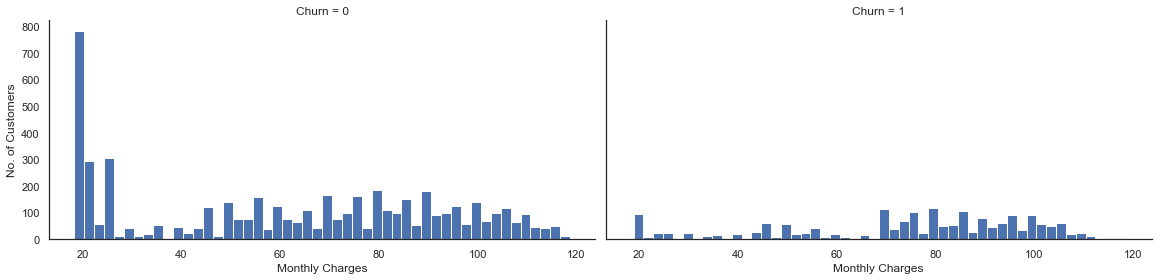

In [16]:
# Distribution of Monthly Charges

monthly = sns.FacetGrid(data=df_churn, col='Churn', height=4, aspect=2)
monthly.map(plt.hist, 'MonthlyCharges', bins=50)


monthly.set(xlabel='Monthly Charges', ylabel='No. of Customers')
plt.show()


In [ ]:
# Customer appears to churn away more when monthly charges are high.
# We can present the plots above more intuitively using Kernel Density Estimate Plot

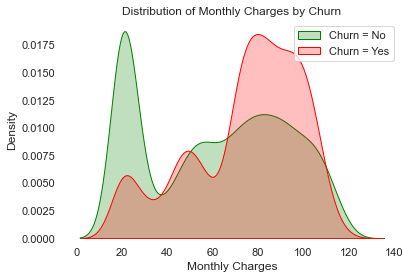

In [17]:
ax = sns.kdeplot(df_churn.MonthlyCharges[(df_churn["Churn"] == 0) ],
                color="Green", shade = True)
ax = sns.kdeplot(df_churn.MonthlyCharges[(df_churn["Churn"] == 1) ],
                ax =ax, color="Red", shade= True)
ax.legend(["Churn = No","Churn = Yes"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)


# figure size in inches
sns.set(rc={'figure.figsize':(7,5)})

In [ ]:
# Here it's evident that customers are more likely to churn when the Monthly Charges are high

D:\pythonjb\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\pythonjb\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None, None, None, None]

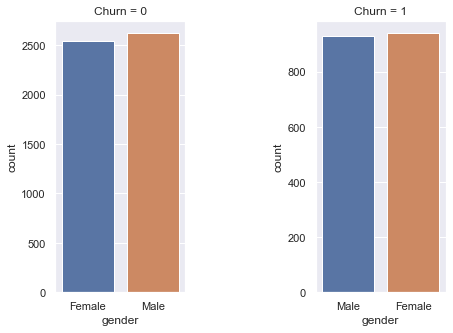

In [18]:
# Gender

df_churn_y = df_churn[df_churn['Churn']==1]
df_churn_n = df_churn[df_churn['Churn']==0]

fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(df_churn_n['gender'], ax=ax[0])
ax[0].set_title('Churn = 0')
plt.setp(ax[0].get_xticklabels(), rotation=0, ha="center")

sns.countplot(df_churn_y['gender'], ax=ax[1])
ax[1].set_title('Churn = 1')
plt.setp(ax[1].get_xticklabels(), rotation=0, ha="center")

In [ ]:
# The male:female ratio is constant across the customer who have churned away and those who haven't
# Hence, it seems that gender does not have an impact on churn rates

D:\pythonjb\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\pythonjb\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None, None, None, None, None, None]

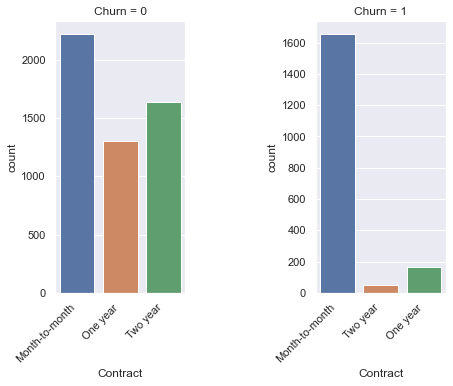

In [20]:
# Contract Type

df_churn_y = df_churn[df_churn['Churn']==1]
df_churn_n = df_churn[df_churn['Churn']==0]

fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(df_churn_n['Contract'], ax=ax[0])
ax[0].set_title('Churn = 0')
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right")

sns.countplot(df_churn_y['Contract'], ax=ax[1])
ax[1].set_title('Churn = 1')
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right")

In [ ]:
# The proportion of M0nth-to-Month contract is distinctly high among the customers who have

D:\pythonjb\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\pythonjb\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None, None, None, None]

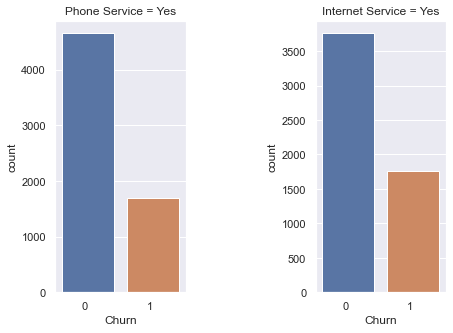

In [21]:
# Phone Service and Internet Service

df_phone = df_churn[df_churn['PhoneService']=='Yes']
df_internet = df_churn[df_churn['InternetService']!='No']


fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(df_phone['Churn'], ax=ax[0])
ax[0].set_title('Phone Service = Yes')
plt.setp(ax[0].get_xticklabels(), rotation=0, ha="right")

sns.countplot(df_internet['Churn'], ax=ax[1])
ax[1].set_title('Internet Service = Yes')
plt.setp(ax[1].get_xticklabels(), rotation=0, ha="right")

In [ ]:
# Among the users of Phone and Internet Service, the proportions of the customers churning 

D:\pythonjb\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\pythonjb\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None, None, None, None]

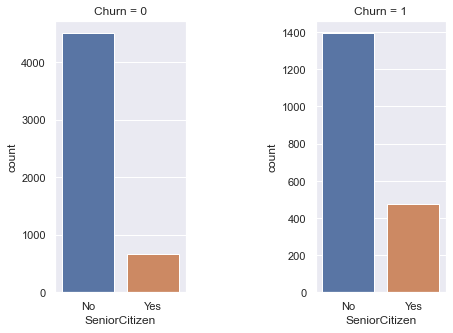

In [22]:
# Senior Citizens

# Gender

df_churn_y = df_churn[df_churn['Churn']==1]
df_churn_n = df_churn[df_churn['Churn']==0]

fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(df_churn_n['SeniorCitizen'], ax=ax[0])
ax[0].set_title('Churn = 0')
plt.setp(ax[0].get_xticklabels(), rotation=0, ha="center")

sns.countplot(df_churn_y['SeniorCitizen'], ax=ax[1])
ax[1].set_title('Churn = 1')
plt.setp(ax[1].get_xticklabels(), rotation=0, ha="center")

D:\pythonjb\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\pythonjb\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None, None, None, None]

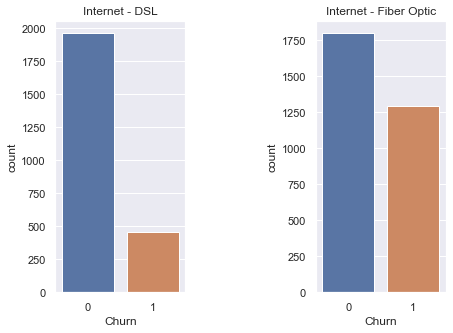

In [23]:
# Users of DSL and Fiber Optic Internet Service

df_dsl = df_churn[df_churn['InternetService']=='DSL']
df_fiber = df_churn[df_churn['InternetService']=='Fiber optic']

fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(df_dsl['Churn'], ax=ax[0])
ax[0].set_title('Internet - DSL')
plt.setp(ax[0].get_xticklabels(), rotation=0, ha="center")

sns.countplot(df_fiber['Churn'], ax=ax[1])
ax[1].set_title('Internet - Fiber Optic')
plt.setp(ax[1].get_xticklabels(), rotation=0, ha="center")

In [ ]:
# It is clearly visible that the proportion of customers churning is higher the users of the Fiber 

Text(0, 0.5, 'Monthly Charges ($)')

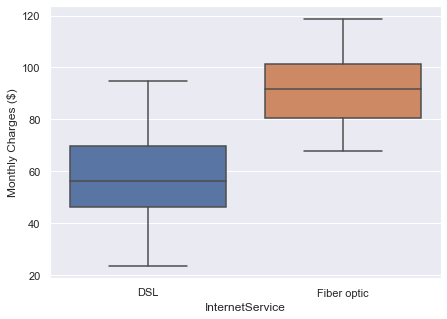

In [24]:
# let's check the prices of the DSL and Fiber Optic Internet Services using boxplot

df_dsl_fiber = df_churn[df_churn['InternetService']!='No']

internet = sns.boxplot(x = df_dsl_fiber.InternetService, y = df_dsl_fiber.MonthlyCharges)
internet.set_ylabel('Monthly Charges ($)')

In [ ]:
# Fiber optic services are more expensive than the DSL services

In [25]:
# Converting tenure into smaller buckets
bins = [0,6,12,18,24,36,48,60,72,84]
df_churn['Tenure_grouped'] = pd.cut(df_churn['tenure'], bins)
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Tenure_grouped
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,"(0, 6]"
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0,"(24, 36]"
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1,"(0, 6]"
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0,"(36, 48]"
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1,"(0, 6]"


In [26]:
# Removing the continuous version of tenure

df_churn.drop('tenure', axis=1, inplace=True)
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Tenure_grouped
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,"(0, 6]"
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0,"(24, 36]"
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1,"(0, 6]"
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0,"(36, 48]"
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1,"(0, 6]"


In [27]:
# Checking the datatypes
df_churn.dtypes

gender                object
SeniorCitizen         object
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
Churn                  int64
Tenure_grouped      category
dtype: object

In [28]:
# Converting the categorical variables into dummy variables

df_dummy = pd.get_dummies(df_churn, drop_first=True)
df_dummy.head()

,MonthlyCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,"Tenure_grouped_(6, 12]","Tenure_grouped_(12, 18]","Tenure_grouped_(18, 24]","Tenure_grouped_(24, 36]","Tenure_grouped_(36, 48]","Tenure_grouped_(48, 60]","Tenure_grouped_(60, 72]","Tenure_grouped_(72, 84]"
0,29.85,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,56.95,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,53.85,1,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,42.30,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,70.70,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [29]:
df_churn_model = df_dummy
df_churn_model.head()

,MonthlyCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,"Tenure_grouped_(6, 12]","Tenure_grouped_(12, 18]","Tenure_grouped_(18, 24]","Tenure_grouped_(24, 36]","Tenure_grouped_(36, 48]","Tenure_grouped_(48, 60]","Tenure_grouped_(60, 72]","Tenure_grouped_(72, 84]"
0,29.85,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,56.95,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,53.85,1,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,42.30,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,70.70,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# The weights of the variables aligns with the exploratory analysis

# 1. Fiber optic internet service is associated with higher churn rates
# 2. Seniority of the people have a positive relation with churn rates
# 3. Longer tenures have a negative realtionship with churn rates
# 4. Chrun rates diminishes with additional services such as Online backup, Online Security,

In [31]:
df_churn.head()
# Lets examine variables for feature selection
df_churn.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn', 'Tenure_grouped'], dtype=object)

In [33]:
# Preprocessing
df_churn.isnull().sum()
# There are 11 missing value for Total Charges, lets remove these 11 values having missing data from dataset
# Remove NA values 
df_churn.dropna(inplace = True)
# Lets remove customerId from dataset, which is not required for model
telecomDf4dummy = df_churn.iloc[:,1:]
# Converting Label variable i'e Churn to binary Numerical  
telecomDf4dummy['Churn'].replace(to_replace='No',value=0,inplace=True)
telecomDf4dummy['Churn'].replace(to_replace='Yes',value=1,inplace=True)

# Convert categorical variable into dummy/indicator variables
# pd.get_dummies creates a new dataframe which consists of zeros and ones.
dummiesDf = pd.get_dummies(telecomDf4dummy)

"\nNow, we have below predictor/independent variables\nContact Month-To-Month\nTenure\nTotal Charges\nOnline Security\nTech Support_No\nInternet_service_FiberOptics\n\nplt.figure(figsize=(20,10))\ndf_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')\nplt.figure(figsize=(15,10))\ndf_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')\n"

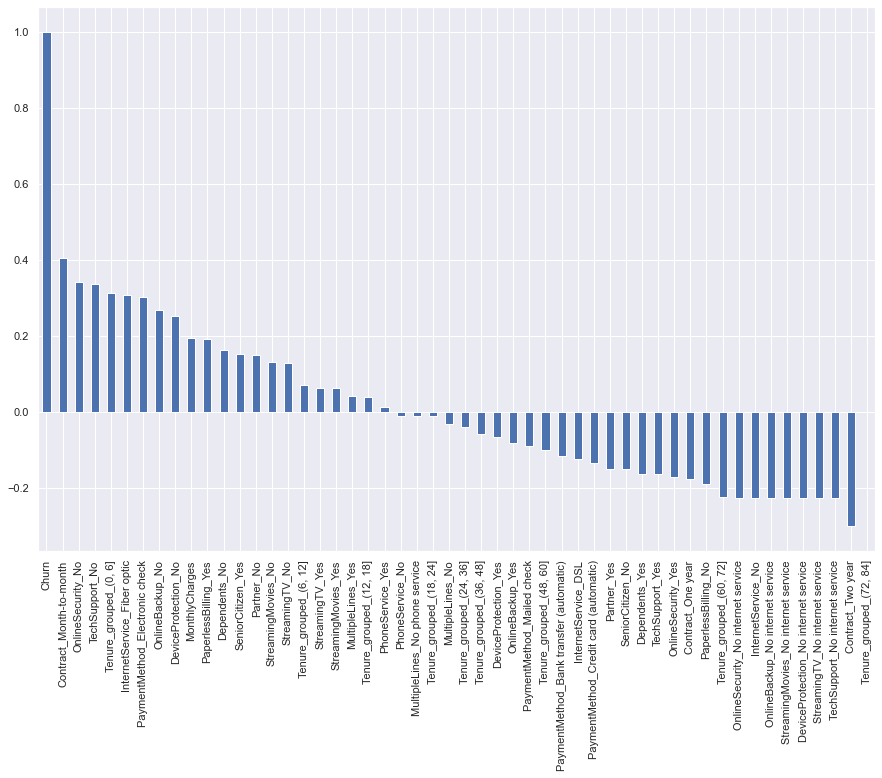

In [37]:
# Feature Selection 

# Now Lets check correlation of Churn with other variables
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
dummiesDf.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
'''
Now, we have below predictor/independent variables
Contact Month-To-Month
Tenure
Total Charges
Online Security
Tech Support_No
Internet_service_FiberOptics

plt.figure(figsize=(20,10))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.figure(figsize=(15,10))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
'''

In [69]:
#  Conclusion:  As per correlation, Month to month contracts, absence of online security and tech support seem to be positively correlated with churn.
#  While, tenure, two year contracts and Internet Service seem to be negatively correlated with churn.
# services such as Online security, streaming TV, online backup, tech support, Device protection, Partner and Streaming movies without internet connection seem to be negatively related to churn.



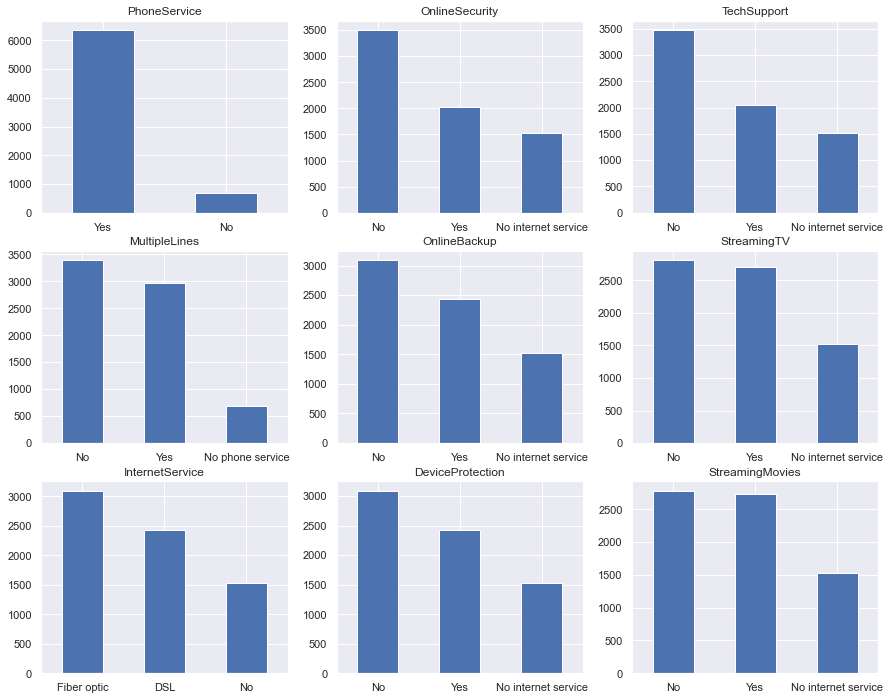

In [71]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df_churn[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df_churn[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df_churn[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

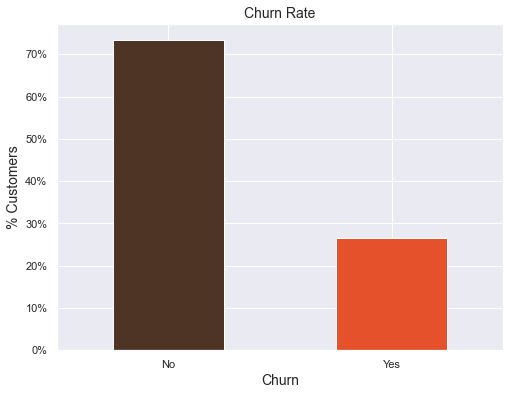

In [78]:
# Lets first look at the churn rate in our data

colors = ['#4D3425','#E4512B']
ax = (df_churn['Churn'].value_counts()*100.0 /len(df_churn)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtic.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)



In [ ]:
# Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [ ]:
def print_unique_col_values(df_churn):
       for column in df_churn:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [ ]:
print_unique_col_values(df_churn)

In [ ]:
Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [91]:
df_churn.replace('No internet service','No',inplace=True)
df_churn.replace('No phone service','No',inplace=True)

In [92]:
print_unique_col_values(df_churn)

CUSTOMERID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
GENDER: ['Female' 'Male']
PARTNER: ['Yes' 'No']
DEPENDENTS: ['No' 'Yes']
PHONESERVICE: ['No' 'Yes']
MULTIPLELINES: ['No phone service' 'No' 'Yes']
INTERNETSERVICE: ['DSL' 'Fiber optic' 'No']
ONLINESECURITY: ['No' 'Yes' 'No internet service']
ONLINEBACKUP: ['Yes' 'No' 'No internet service']
DEVICEPROTECTION: ['No' 'Yes' 'No internet service']
TECHSUPPORT: ['No' 'Yes' 'No internet service']
STREAMINGTV: ['No' 'Yes' 'No internet service']
STREAMINGMOVIES: ['No' 'Yes' 'No internet service']
CONTRACT: ['Month-to-month' 'One year' 'Two year']
PAPERLESSBILLING: ['Yes' 'No']
PAYMENTMETHOD: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TOTALCHARGES: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
CHURN: ['No' 'Yes']


In [ ]:
 # Convert Yes and No to 1 or 0

In [115]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn','SeniorCitizen']
for col in yes_no_columns:
    df_churn[col].replace({'Yes': 1,'No': 0},inplace=True)

In [116]:
df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


In [96]:
for col in df_churn:
    print(f'{col}: {df_churn[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: ['No' 'Yes']
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: [0 1]


In [97]:
df_churn['gender'].replace({'Female':1,'Male':0},inplace=True)
df_churn.gender.unique()

array([1, 0], dtype=int64)

In [ ]:
 # One hot encoding for categorical columns

In [123]:
df_churn = pd.get_dummies(data=df_churn, columns=['InternetService','Contract','PaymentMethod'])
df_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [125]:
df_churn.sample(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2562,0,0,1,1,66,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
5814,0,0,0,0,16,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3544,0,0,1,0,31,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
516,1,0,0,0,28,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
597,0,0,0,0,4,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [126]:
df_churn.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [129]:
cols_to_scale = ['tenure','MonthlyCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_churn[cols_to_scale] = scaler.fit_transform(df_churn[cols_to_scale])

In [130]:
for col in df_churn:
    print(f'{col}: {df_churn[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: 

In [132]:
# splitting train data and test data

X = df_churn.drop('Churn',axis='columns')
y = df_churn['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [133]:
X_train.shape
(5625, 26)



(5625, 26)

In [136]:
X_test.shape
(1407, 26)

(1407, 26)

In [137]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5860,1,0,0,0,0.027778,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2458,0,1,1,0,0.694444,1,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0
5879,0,0,1,0,0.458333,1,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1
4708,1,0,1,1,0.777778,1,0,1,1,1,...,1,0,0,0,0,1,0,1,0,0
1293,0,0,1,1,0.930556,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
2242,0,0,1,1,0.611111,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1444,0,0,0,1,0.569444,1,0,1,1,1,...,0,1,0,0,0,1,0,0,1,0
3269,0,0,0,0,0.902778,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
101,1,0,1,1,0.013889,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4191,1,0,1,0,0.875000,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0


In [138]:
len(X_train.columns)

26